In [1]:
!pip install pandas


In [69]:
import pandas as pd

import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [81]:
json_df = pd.read_json("dim_customer.json")

json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [82]:
#How many unique customers are in the dataset?

customers_unique = len(df["customer_id"].unique())

print("The number of unique customers in data set is", customers_unique)

The number of unique customers in data set is 5191


In [83]:
#What are the different categories of products available? How many unique categories are there?

product_categories = df["category"].unique()

product_number = len(product_categories)

print("The different categories of products available include", product_categories)

print("The number of unique categories is", product_number)

The different categories of products available include ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
The number of unique categories is 8


In [84]:
#Which payment method is the most popular? How many times was it used?

print(df['payment_method'].value_counts())

print("The Cash payment method is the most popular, as it was used 44447 times.")

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64
The Cash payment method is the most popular, as it was used 44447 times.


In [85]:
#What are the three most popular categories, by total sales?

df["total"] = df['quantity'] * df['price']
df.head(10)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
5,I227836,349,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,7502.00
6,I121056,158,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park,40.66
7,I293112,2423,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul,1200.32
8,I293455,3208,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,2700.72
9,I326945,1575,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon,1200.32


In [86]:
print(df.groupby('category').sum()['total'].sort_values(ascending=False))

print("The three most popular categories based on sales are Clothing, Shoes, and Technology.")

category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: total, dtype: float64
The three most popular categories based on sales are Clothing, Shoes, and Technology.


C:\Users\Alyssa\AppData\Local\Temp\ipykernel_2652\997023502.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('category').sum()['total'].sort_values(ascending=False))


In [87]:
#What are the total sales attributed to customers over the age of 45?

df = df.rename(columns={'customer_id': 'id'})
df

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,total
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [88]:
merged_df = pd.merge(df, json_df, on='id', how='left')
merged_df.head(10)

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,34.0,Danielle,F,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,46.0,Christopher,M,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,46.0,Laura,F,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,NaN,Richard,M,Rhodes
5,I227836,349,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,7502.00,64.0,Cindy,F,Meyer
6,I121056,158,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park,40.66,NaN,Kevin,M,Wolfe
7,I293112,2423,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul,1200.32,NaN,Douglas,M,Castaneda
8,I293455,3208,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,2700.72,35.0,Travis,M,Martin
9,I326945,1575,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon,1200.32,67.0,Michael,M,Patrick


In [89]:
total_over = merged_df[merged_df["age"] > 45].sum()["total"]

print("The total sales attributed to customers over 45 is PHP", total_over)

The total sales attributed to customers over 45 is PHP 82039768.15


In [90]:
#How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

merged_df['invoice_date'] = pd.to_datetime(df['invoice_date'])
merged_df['month'] = merged_df['invoice_date'].dt.month
invoice_quant = merged_df['month'].value_counts().sort_index()

merged_df


C:\Users\Alyssa\AppData\Local\Temp\ipykernel_2652\1091884504.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['invoice_date'] = pd.to_datetime(df['invoice_date'])


,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age,first_name,gender,last_name,month
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,34.0,Danielle,F,Rivera,12
2,I127801,644,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,46.0,Christopher,M,Stephens,9
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,Kelly,5
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,NaN,Richard,M,Rhodes,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,Stevens,9
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,NaN,Lauren,F,Perkins,9
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,36.0,Mark,M,Pham,3
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,64.0,David,M,Williams,3


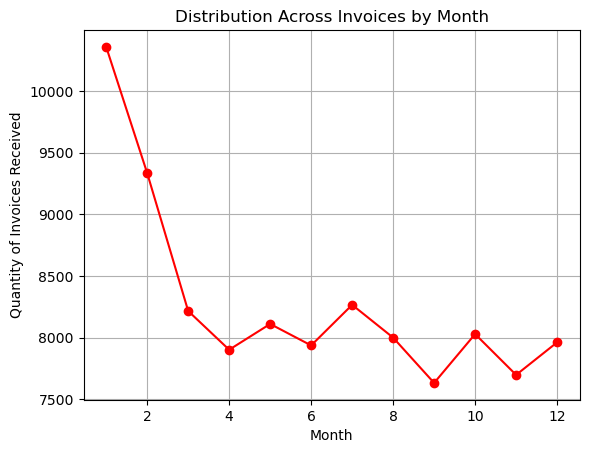

In [91]:

plt.plot(invoice_quant.index, invoice_quant.values, marker='o', linestyle='-', color='red')

plt.xlabel('Month')
plt.ylabel('Quantity of Invoices Received')
plt.grid(True)
plt.title('Distribution Across Invoices by Month')

plt.show()

In [92]:
merged_df['year'] = merged_df['invoice_date'].dt.year
invoice_quant_yr = merged_df['year'].value_counts().sort_index()

merged_df

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age,first_name,gender,last_name,month,year
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5,2022
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,34.0,Danielle,F,Rivera,12,2021
2,I127801,644,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,46.0,Christopher,M,Stephens,9,2021
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,Kelly,5,2021
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,NaN,Richard,M,Rhodes,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,Stevens,9,2022
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,NaN,Lauren,F,Perkins,9,2021
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,36.0,Mark,M,Pham,3,2021
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,64.0,David,M,Williams,3,2021


In [93]:
yr = merged_df['year'].unique()

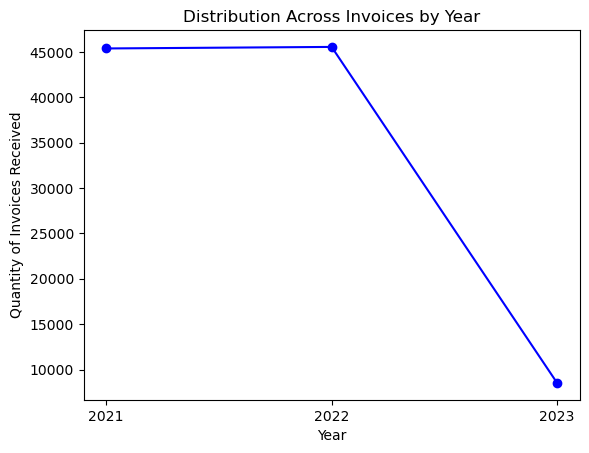

In [94]:
plt.plot(invoice_quant_yr.index, invoice_quant_yr.values, marker='o', linestyle='-', color='blue')

plt.xlabel('Year')
plt.ylabel('Quantity of Invoices Received')
plt.xticks(yr)
plt.title('Distribution Across Invoices by Year')

plt.show()

# In the graph named "Distrbution Across Invoices by Month", it can be seen that there is a relatively large amount of invoices received during January and February. A few of the reasons that I can think of for this result is that customers may be purchasing gifts for different events. Particularly, these purchases can be a late Christmas gift or a Valentine's Day gift, among others. Moreover, I have also researched that there are multiple businesses who administer sales promotions during January in order to diminish their stocks from the previous year. With this, it could attract more customers to purchase items, since implementing promotions and sales are a few of the known marketing strategies that various companies utilize. 

As for the month with the lowest invoices received, September, this could be due to seasonal changes. Based on my research, September marks the end of the summer season in other countries; thus, this could influence consumers to lay low for a while since they may have purchased a number of items (e.g. vacation tickets, summer outfit) during the summer season. 

Moving on to the graph named "Distribution Across Invoices by Year", it can be observed that the invoices received during the years 2021 and 2022 are on the same level. This may imply that the business environment of the companies involved in the data set were stable during 2021 and 2022, despite the presence of COVID-19. With this, the businesses may have done various measures in order to adapt to their current surroundings, such as implementing online shopping. Moreover, this may also imply that the companies have a loyal customer base that remained consistent with their purchases in such firms. As for 2023, the possible reason to why it has a low number of invoices received is because the year has not yet concluded, and there are various factors and events that could relatively change the graph as the year goes on.



In [ ]:
#Create a pivot table showing the breakdown of sales across these dimensions, 
#in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [95]:
pivot_df = merged_df.copy()
pivot_df

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age,first_name,gender,last_name,month,year
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5,2022
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,34.0,Danielle,F,Rivera,12,2021
2,I127801,644,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,46.0,Christopher,M,Stephens,9,2021
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,Kelly,5,2021
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,NaN,Richard,M,Rhodes,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,Stevens,9,2022
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,NaN,Lauren,F,Perkins,9,2021
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,36.0,Mark,M,Pham,3,2021
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,64.0,David,M,Williams,3,2021


In [96]:
pivot_df['decade age range'] = pivot_df['age'] // 10 * 10

pivot_df

,invoice_no,id,category,quantity,price,payment_method,invoice_date,shopping_mall,total,age,first_name,gender,last_name,month,year,decade age range
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,NaN,William,M,Anderson,5,2022,NaN
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,34.0,Danielle,F,Rivera,12,2021,30.0
2,I127801,644,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,46.0,Christopher,M,Stephens,9,2021,40.0
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,Kelly,5,2021,40.0
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,NaN,Richard,M,Rhodes,10,2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,Stevens,9,2022,50.0
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,NaN,Lauren,F,Perkins,9,2021,NaN
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,36.0,Mark,M,Pham,3,2021,30.0
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,64.0,David,M,Williams,3,2021,60.0


In [97]:
my_pivot = pd.pivot_table(pivot_df, values='total', index='category', columns='decade age range', aggfunc=sum)

my_pivot

decade age range,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
